## Observations and Insights 

Observable Trends - Mouse_metadata
1. Capomulin and Ramicane are the most frequent drug regimens used. However, Ramaicane has the lowest standard of error (0.320955), which would indicate the most effective.
2. Distribution between male and female was relatively proportioned in the study.
3. The correlation coefficient between mouse weight and tumor volume was 0.84, which would indicate a strong correlation.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, study_results_df,
                                 how='outer', on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check for NaN in dataset
merged_df.isnull().values.any()

False

In [3]:
# Checking the number of mice in the DataFrame.
len(merged_df["Mouse ID"])

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_id["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dataset_duplicate_mouse_id = merged_df.loc[merged_df["Mouse ID"] == "g989"]
dataset_duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_id = ["g989"]
newcombined_df = merged_df[merged_df["Mouse ID"].isin(drop_id)==False]
newcombined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(newcombined_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_data = newcombined_df.groupby("Drug Regimen")
tumor_sum = stats_data
tumor_sum_df = pd.DataFrame({"Mean Tumor Vol": tumor_sum["Tumor Volume (mm3)"].mean(), 
                           "Median Tumor Vol": tumor_sum["Tumor Volume (mm3)"].median(), 
                           "Variance Tumor Vol": tumor_sum["Tumor Volume (mm3)"].var(), 
                           "Tumor Vol Std. Dev.": tumor_sum["Tumor Volume (mm3)"].std(),
                           "Tumor Vol Std. Error": tumor_sum["Tumor Volume (mm3)"].sem()})                                                              
tumor_sum_df

,Mean Tumor Vol,Median Tumor Vol,Variance Tumor Vol,Tumor Vol Std. Dev.,Tumor Vol Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
data1 = newcombined_df.groupby(["Drug Regimen", "Timepoint"])
mean_tumor = (data1["Tumor Volume (mm3)"]).mean().reset_index()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor)
mean_tumor.head()


,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
newcombined_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]}) 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

Text(0, 0.5, 'Number of Mice')

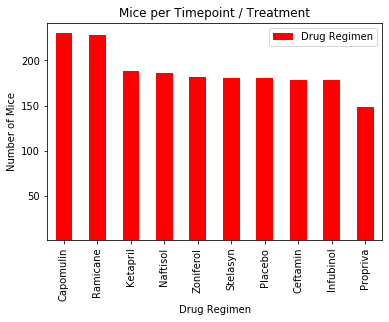

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas
barplot_count = newcombined_df["Drug Regimen"].value_counts()

miceplot = barplot_count.plot(kind="bar", title="Mice per Timepoint / Treatment", color="red", legend=True, xlim=-0.75, ylim=0.5)

# Set a Title and labels
miceplot.set_xlabel("Drug Regimen")
miceplot.set_ylabel("Number of Mice")


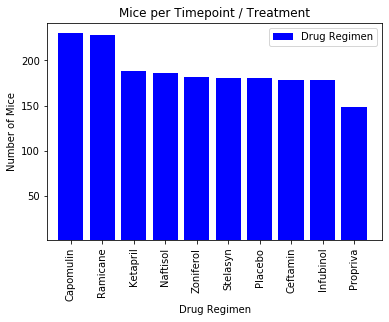

In [12]:
#Generate a bar plot showing the number of mice per time point for each teatment throughout the course of the study using plyplot.

plt.bar(barplot_count.index.values,barplot_count.values, color="blue")

# Set a Title and labels
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.title("Mice per Timepoint / Treatment")
plt.legend(["Drug Regimen"])

# Set x and y limits
plt.xlim(-0.75)
plt.ylim(0.5)

plt.savefig("./images/barplot_plyplot")

## Pie Plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F46831D848>],
      dtype=object)

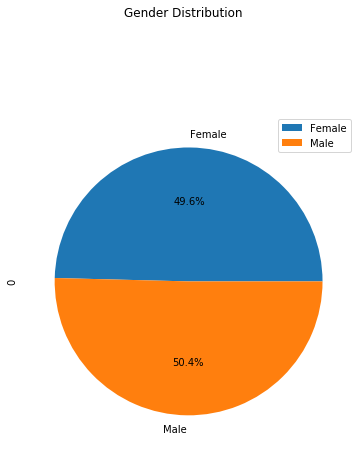

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_gender = newcombined_df.groupby(["Mouse ID", "Sex"]).size()
mice_gender = pd.DataFrame(group_gender.groupby(["Sex"]).count())
mice_gender.plot(kind="pie", subplots=True, figsize=(6,8), title="Gender Distribution", legend=True, autopct="%1.1f%%")

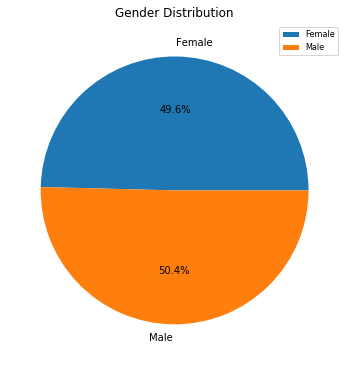

In [14]:
gender_count = mice_gender[0]
fig1, ax1 = plt.subplots(figsize=(6, 8))

plt.pie(gender_count, labels=["Female", "Male"], autopct="%1.1f%%")

# Set a Title and labels
plt.title("Gender Distribution")
plt.legend(loc="upper right", prop={'size': 8})

#save image
plt.savefig("./images/pie_plyplot")

## Quartiles, Outliers and Boxplots

In [15]:
# Final tumor volume of each mouse across four of the most promising treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin (based on SEM output)
# Calculate the quartiles and IQR and quantitatively determine 
# if there are any potential outliers across all four treatment regimens

Capomulin_df = newcombined_df.loc[newcombined_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = newcombined_df.loc[newcombined_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = newcombined_df.loc[newcombined_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = newcombined_df.loc[newcombined_df["Drug Regimen"] == "Ceftamin", :]

# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, newcombined_df, on=("Mouse ID","Timepoint"),how="left")

Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_merge["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [16]:
# Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, newcombined_df, on=("Mouse ID","Timepoint"),how="left")

Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles = Ramicane_merge["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [17]:
# Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, newcombined_df, on=("Mouse ID","Timepoint"),how="left")

Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles = Infubinol_merge["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [18]:
# Ceftmain
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, newcombined_df, on=("Mouse ID","Timepoint"),how="left")

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_merge["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


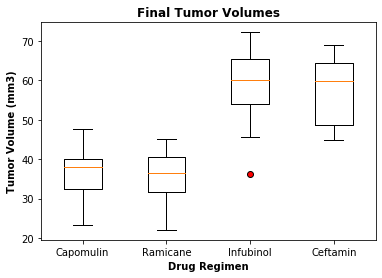

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
flierprops = dict(markerfacecolor="red")
plt.boxplot([Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors], flierprops=flierprops, labels=Regimen)

#Set title and labels
plt.title("Final Tumor Volumes", fontweight='bold')
plt.xlabel("Drug Regimen", fontweight='bold')
plt.ylabel("Tumor Volume (mm3)", fontweight='bold')

# Save image
plt.savefig("./images/box plot")

## Line and Scatter Plots

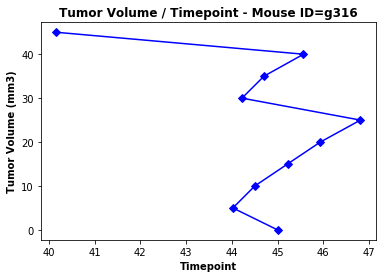

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plotline_df = Capomulin_df.loc[Capomulin_df["Drug Regimen"] == "Capomulin",:]
forline_df = plotline_df.loc[plotline_df["Mouse ID"]== "g316"]

y_axis = forline_df["Timepoint"]
x_axis = forline_df["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis,color="blue", marker="D")

# Set title and labels
plt.xlabel("Timepoint", fontweight='bold')
plt.ylabel("Tumor Volume (mm3)", fontweight='bold')
plt.title("Tumor Volume / Timepoint - Mouse ID=g316", color="black", fontweight='bold')
               
# Save image
plt.savefig("./images/scatter_plot_ID=g316")                     

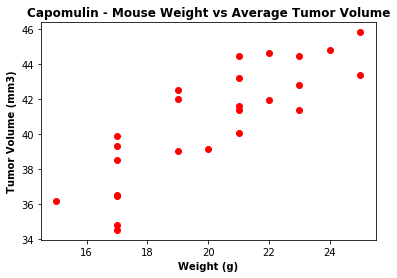

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatplot_df = Capomulin_df.loc[Capomulin_df["Drug Regimen"] == "Capomulin",:]
scatplot_avg_df =Capomulin_df.groupby(['Mouse ID']).mean()

x_values = scatplot_avg_df["Weight (g)"]
y_values = scatplot_avg_df["Tumor Volume (mm3)"]

plt.scatter(x_values,y_values, color="red")

# Set title and labels
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')
plt.title('Capomulin - Mouse Weight vs Average Tumor Volume', color="black", fontweight='bold')

# Save image
plt.savefig("./images/scatter plot")

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84
Value of R^2 = 0.709


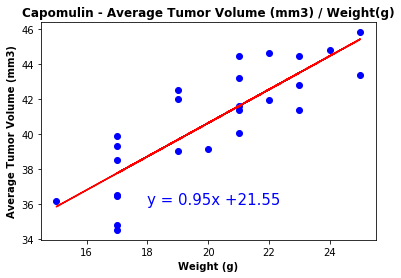

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation coefficient
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(sts.pearsonr(x_values,y_values)[0],2)}")

#linear regression model
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values, y_values)
regress_values = slope*x_values+intercept
lineeq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values, regress_values, "r")

# Set a Title and labels
plt.xlabel("Weight (g)", fontweight='bold')
plt.ylabel("Average Tumor Volume (mm3)", fontweight='bold')
plt.title("Capomulin - Average Tumor Volume (mm3) / Weight(g)", color="black", fontweight='bold') 
plt.annotate(lineeq,(18,36), fontsize=15, color="b")

#Print
print(f'Value of R^2 = {round(rvalue*rvalue,3)}')

# Save image
plt.savefig("./images/scatter_corr_reg")